American sign language alphabet detection from images



In [ ]:
from google.colab import files

files.upload(); # upload your kaggle.json file

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
!kaggle datasets download lexset/synthetic-asl-alphabet

100% 6.58G/6.58G [03:51<00:00, 26.6MB/s]
100% 6.58G/6.58G [03:51<00:00, 30.5MB/s]


In [ ]:
!unzip /content/datasets/lexset/synthetic-asl-alphabet/synthetic-asl-alphabet.zip

Voogesituse väljund on kärbitud viimase 5000 reani.
  inflating: Train_Alphabet/U/6f3439aa-c9f3-4279-830c-e7b417425835.rgb_0000.png  
  inflating: Train_Alphabet/U/6fc70b21-eb34-42e6-8fa5-368a753a311e.rgb_0000.png  
  inflating: Train_Alphabet/U/700d1cf4-d43f-4d04-ba14-bbb6e9273c38.rgb_0000.png  
  inflating: Train_Alphabet/U/703451c9-380e-41a3-962e-0ef7290f04ec.rgb_0000.png  
  inflating: Train_Alphabet/U/7068eb2d-4d24-4a05-bddf-63fc4e296005.rgb_0000.png  
  inflating: Train_Alphabet/U/706cde46-580e-42d7-8752-2a751d4a2d1a.rgb_0000.png  
  inflating: Train_Alphabet/U/70a03f73-8d9b-48e1-b7d2-d1269fe44efc.rgb_0000.png  
  inflating: Train_Alphabet/U/70b8a34d-9529-4ed3-9570-cdf55ae9659e.rgb_0000.png  
  inflating: Train_Alphabet/U/70ddd4cc-3a15-4b37-bd9d-ea70752e74bb.rgb_0000.png  
  inflating: Train_Alphabet/U/71730f20-7e4b-4dcb-8987-a162076760a0.rgb_0000.png  
  inflating: Train_Alphabet/U/71f6eadc-d5ce-44b0-b98b-2174744a81d7.rgb_0000.png  
  inflating: Train_Alphabet/U/72159181-ebda-4b

In [ ]:
!kaggle datasets list  # this should work if everything is ok

ref                                                             title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                             9KB  2022-10-06 08:55:25          12734        404  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset      11KB  2022-09-30 04:05:11          10131        314  1.0              
thedevastator/240000-household-electricity-consumption-records  Household Electricity Consumption            3MB  2022-10-24 01:22:40            830         22  1.0              
akshaydattatraykhare/data-for-admission-in-the-university       Data for Admission in the University     

# DATA NORMALIZATION



1.   Grayscale?
2.   Edge detection/OpenCV?
3.   Crop images to make them smaller
4.   Whatever else?



In [ ]:
!ls
!pip install fastai==1.0.61

alphabet.jpg  datasets	sample_data  Test_Alphabet  Train_Alphabet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 239 kB 15.4 MB/s 
     |████████████████████████████████| 355 kB 72.2 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=1115c08e40c3ee4d51290385761648532358ebb72d16730ddfedba5aebfec26b
  Stored in directory: /root/.cache/pip/wheels/b9/b1/68/cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.10
    Uninstalling fastai-2.7.10:
      Successfully uninstalled fastai-2.7.10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from fastai.vision import *
from fastai.metrics import error_rate

In [20]:
path = "/content/Train_Alphabet/"
path2 = "/content/Test_Alphabet/"
train_images = list()
train_labels = list()
test_images = list()
test_labels = list()
limit = 20
count2 = 0
for subdir in os.scandir(path):
    if subdir.is_dir():
      count = 0
      for imgfile in os.scandir(subdir.path):
        if imgfile.is_file():
          os.remove(imgfile.path)
          #train_images.append(imread(imgfile.path))
          train_labels.append(subdir.path.split('/')[-1])
          count += 1
          count2 += 1
          # if count > limit:
          #   break
      os.rmdir(subdir.path)
print(count2)
count2 = 0
for subdir in os.scandir(path2):
    if subdir.is_dir():
      for imgfile in os.scandir(subdir.path):
        if imgfile.is_file():
          os.remove(imgfile.path)
          #test_images.append(imread(imgfile.path))
          #test_labels.appesubdir.path.split('/')[-1])
          count2 += 1
      os.rmdir(subdir.path)
print(count2)


24300
2700


In [24]:
print(len(set(train_labels)))
all_labels = list(set(train_labels))
all_labels.sort()
print(all_labels)

27
['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:

np.random.seed(42)
#don't know about size variable
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
                                  size=512, num_workers=1)#.normalize(imagenet_stats)

In [ ]:
data.classes
data.train_ds

LabelList (19440 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
Blank,Blank,Blank,Blank,Blank
Path: /content/Train_Alphabet

In [ ]:
data.valid_ds

LabelList (4860 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
J,K,J,E,L
Path: /content/Train_Alphabet

In [ ]:
print(data.test_ds)

None


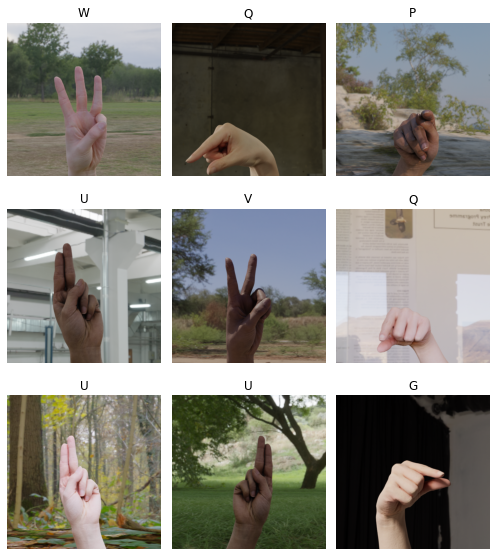

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

# TRAIN

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.353628,0.086748,0.972428,07:57
1,0.081999,0.030172,0.992181,07:48


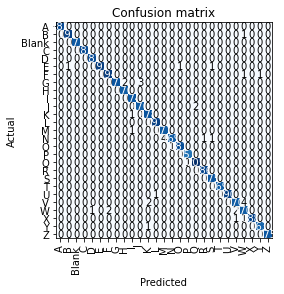

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(2)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
import pickle
import os

learn.save("/content/fastai_1")
learn.export("/content/fa_export")


In [19]:
file = open('/content/pickle.pkl', 'wb')
pickle.dump(learn, file)
file.close()

TypeError: ignored

In [15]:
img = open_image("/content/Test_Alphabet/A/081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png")



In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'A'

In [ ]:
learn.show_results()
interp.plot_top_losses(9, figsize=(15,10))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
learn.validate()

[0.028561892, tensor(0.9926)]

In [ ]:
preds,y = learn.get_preds()
# test = ImageDataBunch.from_folder(path2)
# pred_class,pred_idx,outputs = learn.get_preds(test)
# pred_class.obj

In [ ]:
preds[:5], y[:5]

(tensor([[1.3272e-10, 3.4690e-14, 8.9407e-14, 3.5331e-11, 1.6347e-13, 2.4251e-11,
          6.4403e-16, 2.9300e-10, 1.2906e-11, 6.6735e-13, 5.0599e-12, 3.8353e-14,
          3.7515e-12, 7.0882e-12, 1.7226e-10, 2.6105e-14, 3.4311e-13, 9.3857e-15,
          1.1327e-10, 6.4383e-09, 1.0000e+00, 7.3978e-12, 1.5118e-15, 1.1417e-15,
          1.7476e-14, 4.2518e-12, 6.0182e-11],
         [4.0562e-07, 2.1816e-10, 3.9430e-11, 6.5761e-08, 2.2636e-08, 2.5343e-09,
          7.0160e-13, 3.0564e-08, 7.3709e-09, 3.1791e-08, 7.8061e-08, 2.5502e-12,
          1.4669e-06, 3.4778e-08, 1.9717e-07, 7.6332e-11, 8.1618e-11, 6.8960e-11,
          4.4408e-09, 1.2125e-07, 1.0000e+00, 7.4545e-10, 4.2997e-11, 3.8200e-11,
          5.1586e-09, 5.2609e-09, 6.0846e-08],
         [1.9409e-05, 8.9735e-10, 1.3581e-11, 2.2875e-08, 1.5625e-10, 4.0709e-10,
          1.0338e-11, 2.9047e-08, 2.0242e-05, 2.9522e-06, 2.9548e-11, 5.4980e-12,
          7.4917e-09, 3.7860e-10, 3.6245e-05, 2.2355e-11, 2.2974e-12, 7.1082e-12,
    

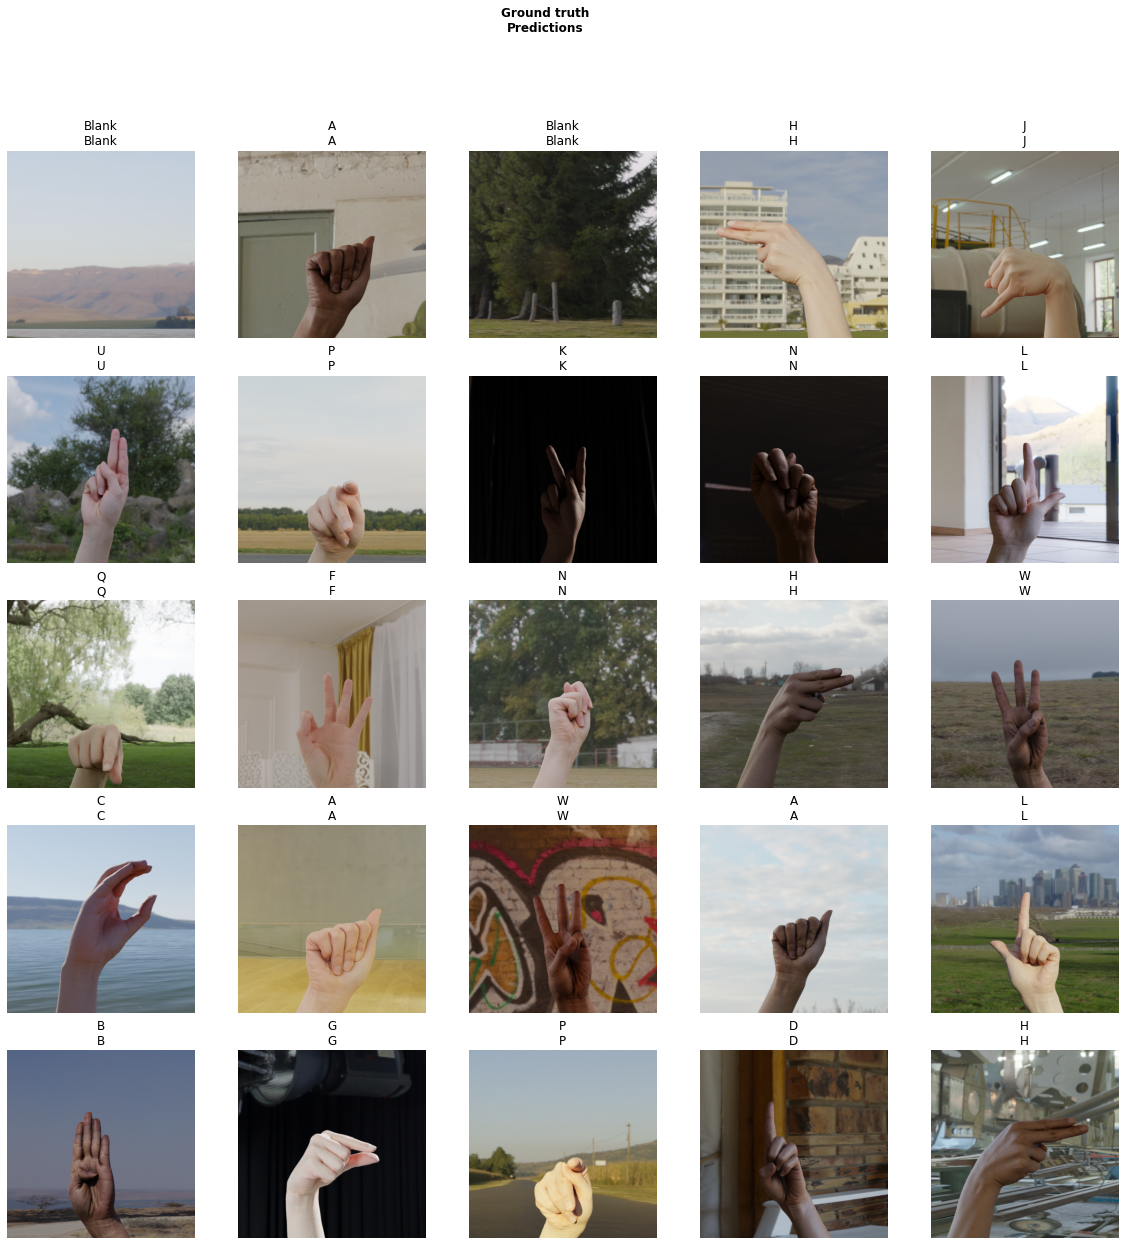

In [ ]:
learn.show_results()

In [ ]:
#manual accuracy calc
results = list()
for subdir in os.scandir(path2):
    if subdir.is_dir():
      for imgfile in os.scandir(subdir.path):
        if imgfile.is_file():
          #test_images.append(imread(imgfile.path))
          label = subdir.path.split('/')[-1]
          pred_class,pred_idx,outputs = learn.predict(open_image(imgfile.path))
          print(pred_class.obj, label, pred_class.obj == label)
          results.append(pred_class.obj == label)
print(sum(results) / len(results))

X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
X X True
I I True
I I True
I I True
I I True
I I True
I I True
I I True
I I True
I I True
I I True
I I True
I

In [ ]:
print()

In [ ]:
t